<a href="https://colab.research.google.com/github/singhn156/Car-Insurance-Prediction/blob/Data/Carr_Insurance_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Insurance Subcribe Predition**
This is a dataset from one bank in the United States. Besides usual services, this bank also provides car
insurance services. The bank organizes regular campaigns to attract new clients. The bank has potential
customers’ data, and bank’s employees call them for advertising available car insurance options. We are
provided with general information about clients (age, job, etc.) as well as more specific information about the
current insurance sell campaign (communication, last contact day) and previous campaigns (attributes like
previous attempts, outcome).
You have data about 4000 customers who were contacted during the last campaign and for whom the results
of campaign (did the customer buy insurance or not) are known.


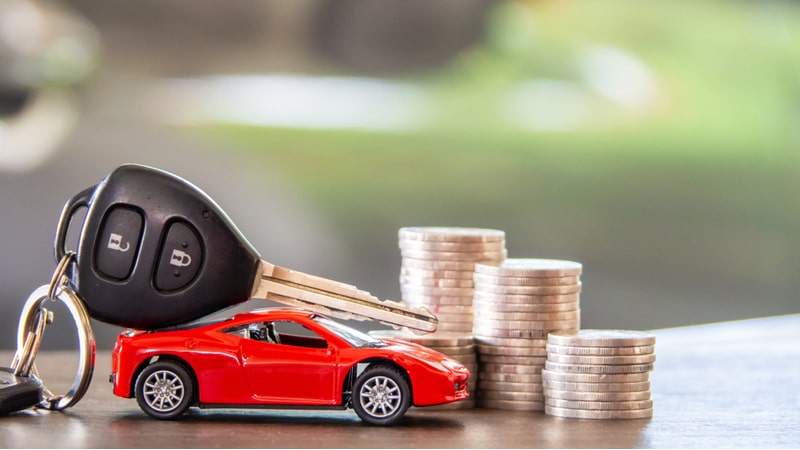

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

train = pd.read_csv("/content/drive/MyDrive/work space/Insurance/carInsurance_train.csv")
test = pd.read_csv("/content/drive/MyDrive/work space/Insurance/carInsurance_test.csv")

pd.set_option('display.max_columns', 200)

In [ ]:
train.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [ ]:
test.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN


In [ ]:
print(train.shape,test.shape)


(4000, 19) (1000, 19)


Combining data for data pre-processing

In [ ]:
train = train.append(test)
train.tail()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
995,4996,31,admin.,single,secondary,0,131,1,0,cellular,15,jun,1,-1,0,NaN,13:54:24,13:56:55,NaN
996,4997,52,management,married,tertiary,0,2635,0,0,cellular,6,sep,1,108,8,success,13:13:38,13:18:51,NaN
997,4998,46,technician,married,tertiary,0,3009,0,0,cellular,4,aug,2,-1,0,NaN,10:23:35,10:24:33,NaN
998,4999,60,retired,married,secondary,0,7038,0,0,telephone,7,oct,4,-1,0,NaN,17:01:49,17:04:07,NaN
999,5000,28,management,single,tertiary,0,957,0,0,cellular,25,may,2,-1,0,NaN,12:15:19,12:30:34,NaN


In [ ]:
train.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4000.000000
mean,2500.500000,41.266400,0.014200,1506.009400,0.49680,0.130600,15.686200,2.587400,49.295800,0.735200,0.401000
std,1443.520003,11.651428,0.118326,3358.730128,0.50004,0.336996,8.413839,2.973235,107.152847,2.069961,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1250.750000,32.000000,0.000000,113.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2500.500000,39.000000,0.000000,538.000000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3750.250000,49.000000,0.000000,1615.250000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,5000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                5000 non-null   int64  
 1   Age               5000 non-null   int64  
 2   Job               4976 non-null   object 
 3   Marital           5000 non-null   object 
 4   Education         4784 non-null   object 
 5   Default           5000 non-null   int64  
 6   Balance           5000 non-null   int64  
 7   HHInsurance       5000 non-null   int64  
 8   CarLoan           5000 non-null   int64  
 9   Communication     3877 non-null   object 
 10  LastContactDay    5000 non-null   int64  
 11  LastContactMonth  5000 non-null   object 
 12  NoOfContacts      5000 non-null   int64  
 13  DaysPassed        5000 non-null   int64  
 14  PrevAttempts      5000 non-null   int64  
 15  Outcome           1201 non-null   object 
 16  CallStart         5000 non-null   object 
 

Test data has Nan value for CarInsurance feature.

In [ ]:
train.groupby('CarInsurance').count()["Id"]

CarInsurance
0.0    2396
1.0    1604
Name: Id, dtype: int64

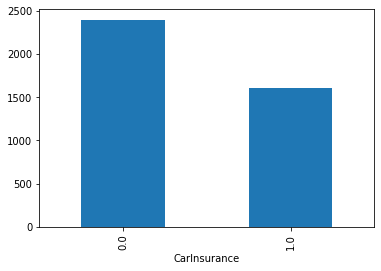

In [ ]:


train.groupby('CarInsurance').count()["Id"].plot(kind="bar")


Calculated of percent of missing values for features

In [ ]:
Dic={}
for Column,Value in train.isnull().sum().items():
    if Value>0:
        Dic[Column]=Value
       
    
for Col,val in Dic.items():
    print(Col,"------",val,"------Percent of Missing values------",(val/4000)*100,"%")

Job ------ 24 ------Percent of Missing values------ 0.6 %
Education ------ 216 ------Percent of Missing values------ 5.4 %
Communication ------ 1123 ------Percent of Missing values------ 28.075 %
Outcome ------ 3799 ------Percent of Missing values------ 94.975 %
CarInsurance ------ 1000 ------Percent of Missing values------ 25.0 %


Outcome feature has 94% missing values which is very high and cannot be replaced.  

In [ ]:
train.drop(['Outcome'],axis =1, inplace = True)

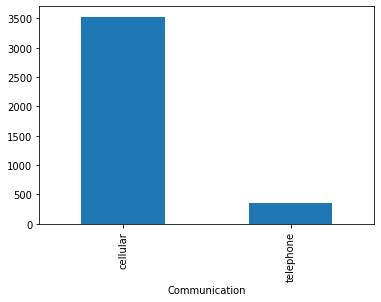

In [ ]:
train.groupby('Communication').count()["Id"].plot(kind="bar")

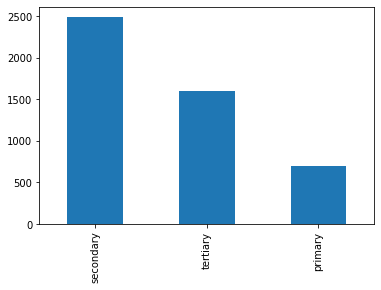

In [ ]:
train['Education'].value_counts().plot.bar()

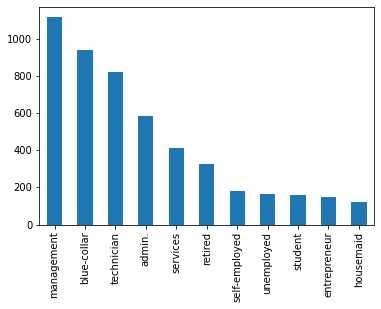

In [ ]:
train['Job'].value_counts().plot.bar()

All Categorical (except CarInsurance feature because 25% missing value comes fron test data) missing value replaced with mode(most frequent) value of that feature.

In [ ]:
train['Job'].value_counts().index[0]

'management'

In [ ]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [ ]:
for feature in ['Job','Education','Communication']:
    impute_nan(train,feature)

In [ ]:
train.isnull().sum()

Id                     0
Age                    0
Job                    0
Marital                0
Education              0
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication          0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

Numerical encoding of Categorical features.


1.   Ordinal variables (Martial,Education,LastCantactMonth) encoded with Numeric values
2.   Job and Communication features encoded with respective count values.
3.   CallEnd and CallStart features encoded with their diff of time of second.













In [ ]:
for feature in train.columns[:]:
    if train[feature].dtype == 'object':
        
        print(feature,":",len(train[feature].unique()),'labels')

Job : 12 labels
Marital : 3 labels
Education : 4 labels
Communication : 3 labels
LastContactMonth : 12 labels
CallStart : 4640 labels
CallEnd : 4630 labels


In [ ]:
train['Education'].unique()

array(['tertiary', 'primary', 'secondary', 694], dtype=object)

In [ ]:
train['Communication'].unique()

array(['telephone', 348, 'cellular'], dtype=object)

In [ ]:
train['Job'].unique()

array(['management', 'blue-collar', 'student', 'technician', 'admin.',
       'services', 'self-employed', 'retired', 123, 'housemaid',
       'entrepreneur', 'unemployed'], dtype=object)

In [ ]:
train['Marital'].unique()

array(['single', 'married', 'divorced'], dtype=object)

In [ ]:
dic_month={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
dic_edu={'primary':1,'secondary':2,'tertiary':3,694:2}
dic_comm={'telephone':0,'cellular':1,'tertiary':3,348:1}
dic_martial = {'single':1,'married':2,'divorced':3}
dic_job=train.Job.value_counts().to_dict()
dic_job[123]=1114

In [ ]:
dic_job

{123: 1114,
 'admin.': 586,
 'blue-collar': 937,
 'entrepreneur': 149,
 'housemaid': 123,
 'management': 1114,
 'retired': 326,
 'self-employed': 182,
 'services': 414,
 'student': 158,
 'technician': 823,
 'unemployed': 164}

In [ ]:
train['LastContactMonth']=train['LastContactMonth'].map(dic_month)
train['Education']=train['Education'].map(dic_edu)
train['Communication']=train['Communication'].map(dic_comm)
train['Marital']=train['Marital'].map(dic_martial)
train['Job']=train['Job'].map(dic_job)

In [ ]:
train['Call']=(pd.to_datetime(train['CallEnd'])-pd.to_datetime(train['CallStart'])).astype('timedelta64[s]')

In [ ]:
train.drop(['CallEnd','CallStart'],axis =1, inplace = True)

Dividing dataset into previous ratio.

In [ ]:
test = train[4000:]
train = train[0:4000]

In [ ]:
test.isnull().sum()

Id                     0
Age                    0
Job                    0
Marital                0
Education              0
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication          0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
CarInsurance        1000
Call                   0
dtype: int64

In [ ]:
train.isnull().sum()

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
CarInsurance        0
Call                0
dtype: int64

Correlation Matrix Plot for features Handling

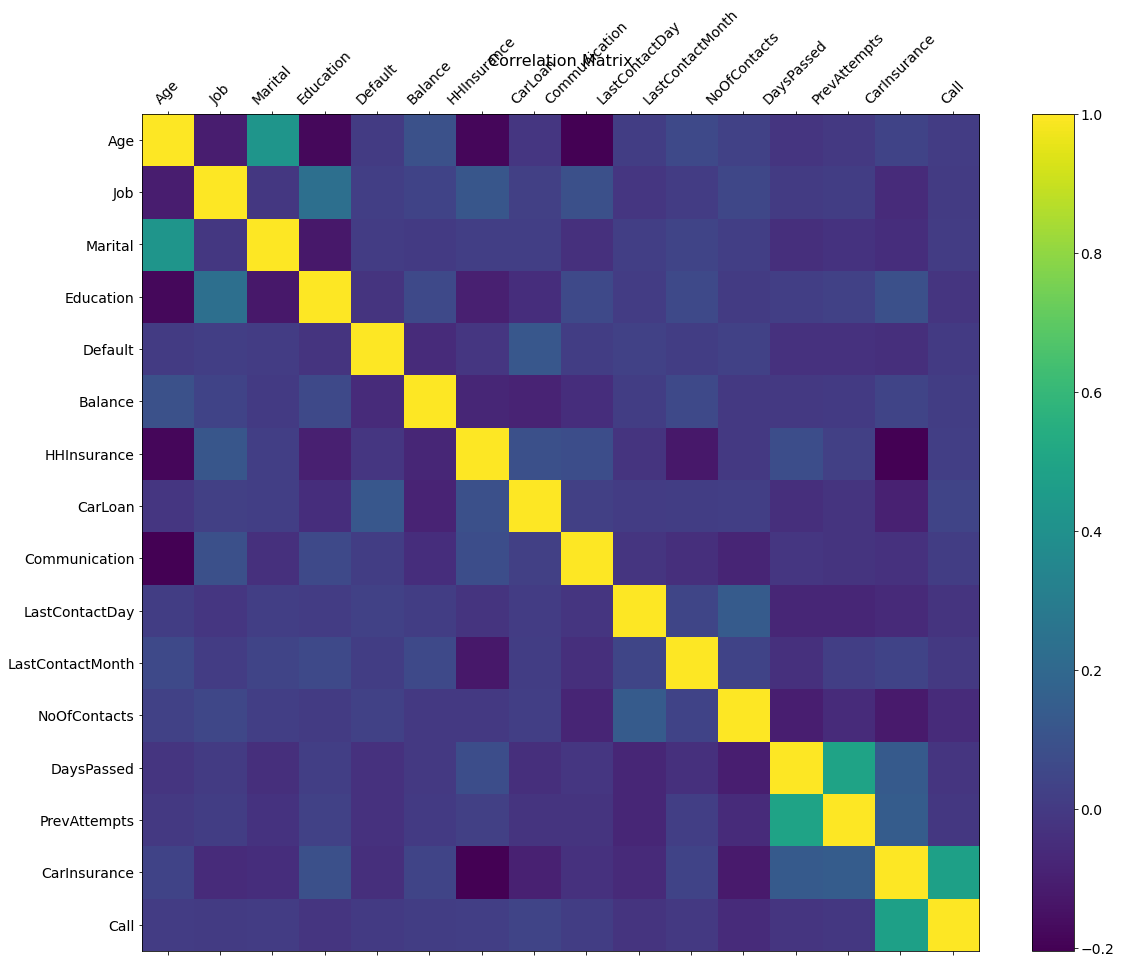

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.loc[:, train.columns != 'Id'].corr(), fignum=f.number)
plt.xticks(range(train.loc[:, train.columns != 'Id'].shape[1]), train.loc[:, train.columns != 'Id'].columns, fontsize=14, rotation=45)
plt.yticks(range(train.loc[:, train.columns != 'Id'].shape[1]), train.loc[:, train.columns != 'Id'].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
train_1=train.loc[:, train.columns != 'CarInsurance']
X_train = train_1.loc[:, train_1.columns != 'Id']
test_1=test.loc[:, test.columns != 'CarInsurance']
X_test = test_1.loc[:, test_1.columns != 'Id']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Logistics and Random forest models are being for Binary Classification. 

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, train['CarInsurance'], test_size = 0.20, random_state = 101)

In [ ]:
#cross validation
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.model_selection import cross_validate

def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')
  

Apply RandomForestClassifier

In [ ]:

## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

#cross validation
RF_report = pd.DataFrame(cross_validate(rf_model, X_train, np.array(train['CarInsurance']), scoring=['accuracy','precision', 'recall','f1']))
#getting required score methods
RF_report = RF_report.iloc[:,2:]
#naming the index
RF_report.index = ['Valid1','Valid2','Valid3','Valid4','Valid5']


#final result collection
model_1 = []

#Classification report
print("Clasification report:\n")
print(RF_report,"\n\n")
print("Mean Scores:\n")
for score in RF_report.columns:
    print(f"\t{score}: {round(RF_report[score].mean(),4)}")
    model_1.append(round(RF_report[score].mean(),4))

Clasification report:

        test_accuracy  test_precision  test_recall   test_f1
Valid1        0.84250        0.810897     0.790625  0.800633
Valid2        0.85000        0.801802     0.831776  0.816514
Valid3        0.82875        0.780488     0.797508  0.788906
Valid4        0.83250        0.794953     0.785047  0.789969
Valid5        0.82125        0.778125     0.775701  0.776911 


Mean Scores:

	test_accuracy: 0.835
	test_precision: 0.7933
	test_recall: 0.7961
	test_f1: 0.7946


In [ ]:
rf_model.fit(Xtrain,ytrain)
ytrain_pred = rf_model.predict_proba(Xtrain)
print('RF train roc-auc: {}'.format(roc_auc_score(ytrain, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(Xtest)
print('RF test roc-auc: {}'.format(roc_auc_score(ytest, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9208371246587808


Apply LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()


#cross validation
LR_report = pd.DataFrame(cross_validate(log_classifier, X_train, np.array(train['CarInsurance']), scoring=['accuracy','precision', 'recall','f1']))
#getting required score methods
LR_report = LR_report.iloc[:,2:]
#naming the index
LR_report.index = ['Valid1','Valid2','Valid3','Valid4','Valid5']


#final result collection
model_2 = []

#Classification report
print("Clasification report:\n")
print(LR_report,"\n\n")
print("Mean Scores:\n")
for score in LR_report.columns:
    print(f"\t{score}: {round(LR_report[score].mean(),4)}")
    model_2.append(round(LR_report[score].mean(),4))


Clasification report:

        test_accuracy  test_precision  test_recall   test_f1
Valid1        0.78500        0.816239     0.596875  0.689531
Valid2        0.78875        0.785714     0.651090  0.712095
Valid3        0.77875        0.770677     0.638629  0.698467
Valid4        0.77125        0.776000     0.604361  0.679510
Valid5        0.78250        0.765343     0.660436  0.709030 


Mean Scores:

	test_accuracy: 0.7812
	test_precision: 0.7828
	test_recall: 0.6303
	test_f1: 0.6977


In [ ]:
log_classifier.fit(Xtrain,ytrain)
ytrain_pred_2 = log_classifier.predict_proba(Xtrain)
print('Logistic train roc-auc: {}'.format(roc_auc_score(ytrain, ytrain_pred_2[:,1])))
ytest_pred_2 = log_classifier.predict_proba(Xtest)
print('Logistic test roc-auc: {}'.format(roc_auc_score(ytest, ytest_pred_2[:,1])))

Logistic train roc-auc: 0.8639812579577285
Logistic test roc-auc: 0.8792906510754458


Both models Perfomance

In [ ]:
Models = pd.DataFrame({
    'Logistic Regression': np.array(model_2),
    'Random Forest': np.array(model_1)})
Models.index = ['accuracy','precision', 'recall','f1']
Models

,Logistic Regression,Random Forest
accuracy,0.7812,0.8350
precision,0.7828,0.7933
recall,0.6303,0.7961
f1,0.6977,0.7946


Identifying Important features for Class variable using Models coef.

Logistics Regression coef for **Feature** **Importance**

Feature: 0, Score: 0.39575
Feature: 1, Score: -0.40870
Feature: 2, Score: -0.33320
Feature: 3, Score: 0.59136
Feature: 4, Score: -0.42233
Feature: 5, Score: -0.11049
Feature: 6, Score: -1.04950
Feature: 7, Score: -0.64408
Feature: 8, Score: -0.27070
Feature: 9, Score: -0.30763
Feature: 10, Score: 0.23570
Feature: 11, Score: -2.57425
Feature: 12, Score: 2.52212
Feature: 13, Score: 2.58680
Feature: 14, Score: 12.11507


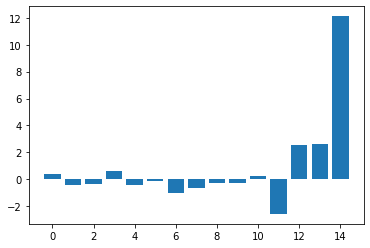

In [ ]:
# get importance
importance = log_classifier.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	  print('Feature: %0d, Score: %.5f' % (i,v))
 

# plot feature importance



plt.bar([x for x in range(len(importance))], importance)

plt.show()


Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

Random Forest Classification coef for **Feature** **Importance**

Feature: 0, Score: 0.09337
Feature: 1, Score: 0.04858
Feature: 2, Score: 0.02255
Feature: 3, Score: 0.02155
Feature: 4, Score: 0.00154
Feature: 5, Score: 0.09805
Feature: 6, Score: 0.03780
Feature: 7, Score: 0.01208
Feature: 8, Score: 0.00719
Feature: 9, Score: 0.08340
Feature: 10, Score: 0.08459
Feature: 11, Score: 0.03766
Feature: 12, Score: 0.05397
Feature: 13, Score: 0.03347
Feature: 14, Score: 0.36421


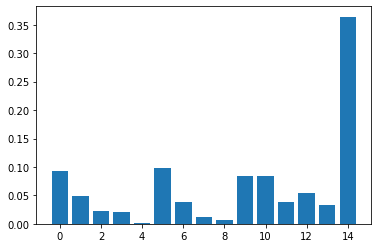

In [ ]:
# get importance
importance = rf_model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	  print('Feature: %0d, Score: %.5f' % (i,v))
 

# plot feature importance



plt.bar([x for x in range(len(importance))], importance)

plt.show()


Random forest feature selection.
The results suggest perhaps **0,5,9,10 and 14** of the 14 features as being important to prediction

**Ensembling the models performance**

In [ ]:
pred=[]
for model in [rf_model,log_classifier]:
    pred.append(pd.Series(model.predict_proba(Xtest)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(ytest,final_prediction)))

Ensemble test roc-auc: 0.9165714801979878


Prediction of four model for each test rows and average of four prediction taken for ensembled model.

In [ ]:
pd.concat(pred,axis=1) 

,0,1
0,0.43,0.615178
1,0.62,0.262920
2,0.67,0.753074
3,0.78,0.785500
4,0.65,0.382827
...,...,...
795,0.00,0.145738
796,0.87,0.602258
797,0.78,0.908293
798,0.83,0.959693


Threshold value is very important for binary classification. As a Default 0.5 is threshold for 0,1 classification.

In [ ]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(ytest, final_prediction)
thresholds

array([1.9432325 , 0.9432325 , 0.93907182, 0.9238189 , 0.89753426,
       0.89699036, 0.84406974, 0.84381136, 0.81077323, 0.80965598,
       0.7899622 , 0.78939976, 0.78798439, 0.78770815, 0.78304075,
       0.78274977, 0.78159149, 0.78071425, 0.77994579, 0.77943047,
       0.76649712, 0.76635429, 0.76410994, 0.76325269, 0.75627825,
       0.75586292, 0.75374961, 0.75028831, 0.74933364, 0.74896396,
       0.74072396, 0.74045797, 0.73495177, 0.73443587, 0.71153683,
       0.70857965, 0.70306538, 0.70264402, 0.69999393, 0.69993262,
       0.69417589, 0.69406459, 0.6888922 , 0.68689079, 0.65587469,
       0.65419817, 0.65268902, 0.65234029, 0.6421977 , 0.64092944,
       0.61617662, 0.61550874, 0.61272549, 0.61231842, 0.6053201 ,
       0.60324094, 0.59953849, 0.5993002 , 0.59583688, 0.59449507,
       0.58651848, 0.58513336, 0.57799951, 0.57551024, 0.57183767,
       0.56926983, 0.56626466, 0.56442659, 0.5613907 , 0.56090093,
       0.56049242, 0.55198584, 0.55062426, 0.54463757, 0.53513

Based on high accuracy,Threshold value is calculated for the binary classification.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(ytest, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(10)

,thresholds,accuracy
85,0.507691,0.84625
86,0.506245,0.84625
87,0.499781,0.84625
99,0.473221,0.84625
101,0.472170,0.84625
103,0.470175,0.84500
88,0.499714,0.84500
89,0.497375,0.84500
97,0.477223,0.84500
100,0.473131,0.84500


Plot of RoC Curve

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

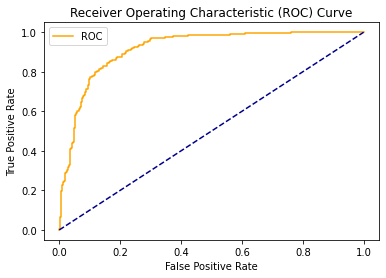

In [ ]:
plot_roc_curve(fpr,tpr)

Confusion Matrix and Classification Report for Best threshold value 0.444706

In [ ]:
new_pred = np.where(final_prediction>0.447406,1,0)

confusion_matrix(ytest, new_pred)

array([[402,  69],
       [ 57, 272]])

In [ ]:

print(classification_report(ytest, new_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       471
         1.0       0.80      0.83      0.81       329

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800



In [ ]:
real_pred=[]
for model in [rf_model,log_classifier]:
    real_pred.append(pd.Series(model.predict_proba(np.array(X_test))[:,1]))
real_final_prediction=pd.concat(real_pred,axis=1).mean(axis=1)


In [ ]:
real_final_prediction= np.where(real_final_prediction>0.447406,1,0)
df = pd.DataFrame(data=real_final_prediction.flatten())
df.head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,0
